In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
data=pd.read_csv('day.csv')
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
data.drop(['instant','dteday'],inplace=True,axis=1)

In [4]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


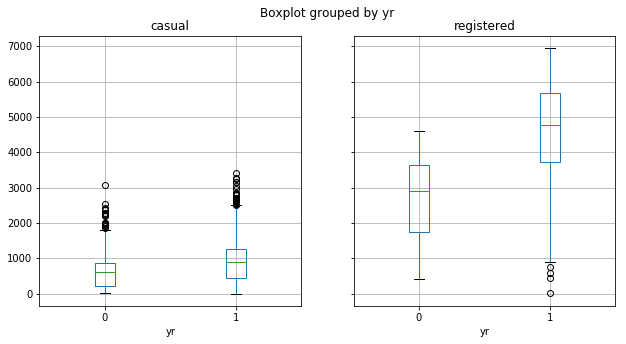

In [5]:
data.boxplot(column=['casual', 'registered'],by='yr',figsize=(10,5))
plt.show()

In [6]:
col_name=['casual', 'registered']
for i in col_name:
    q75,q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    max=q75+iqr
    min=q25-iqr
    data=data.drop(data[data.loc[:,i]>max].index)
    data=data.drop(data[data.loc[:,i]<min].index)

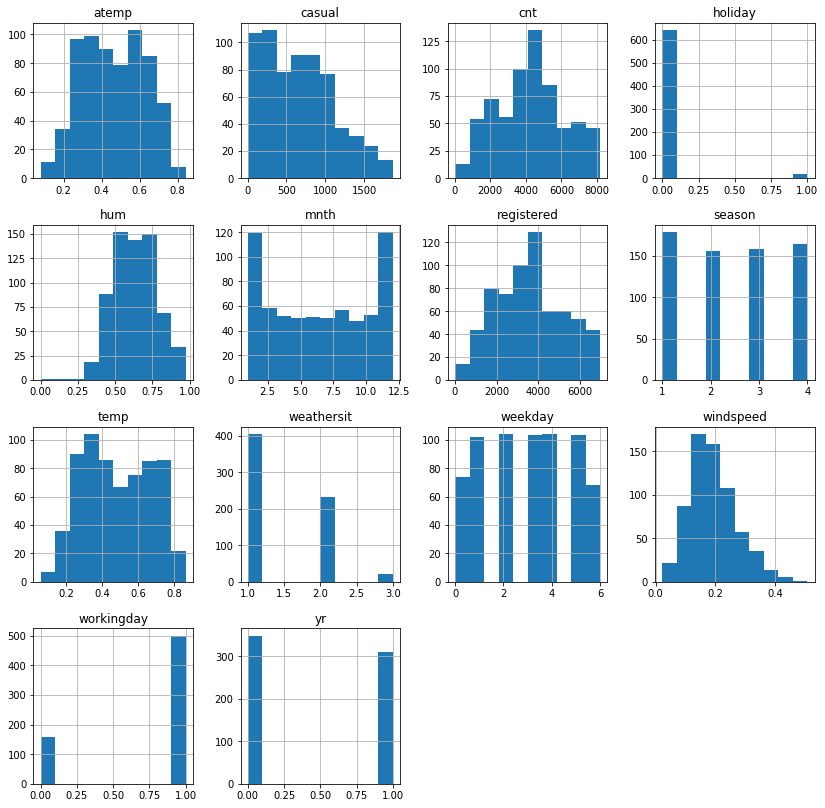

In [7]:
data.hist(figsize=(14,14))
plt.show()

In [8]:
data['registered']=np.log(data.registered)
data['casual']=np.sqrt(data.casual)
data['windspeed']=1/(data.windspeed)

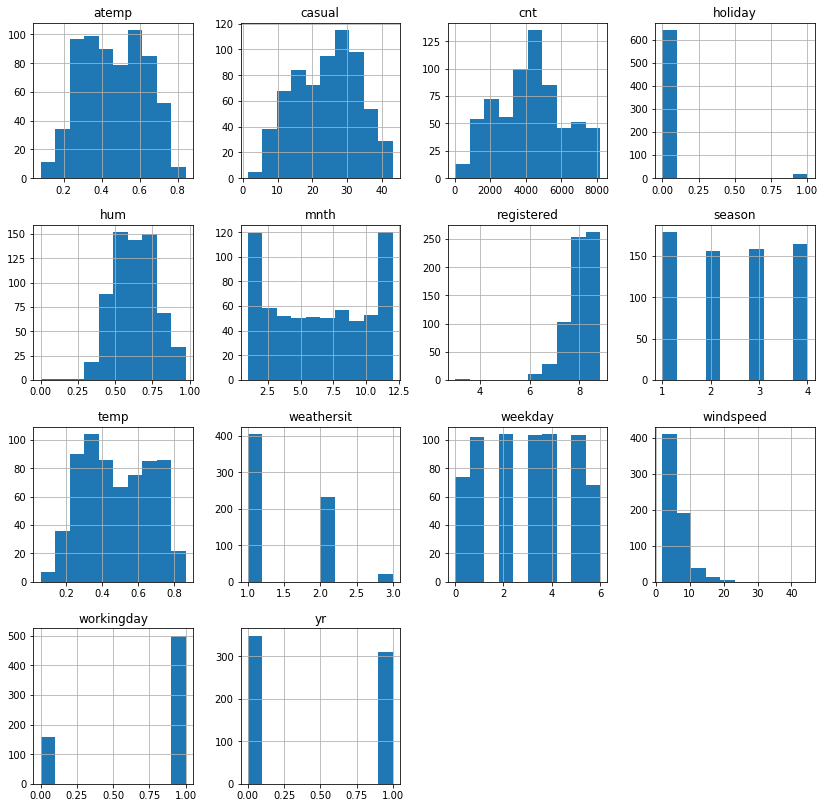

In [9]:
data.hist(figsize=(14,14))
plt.show()

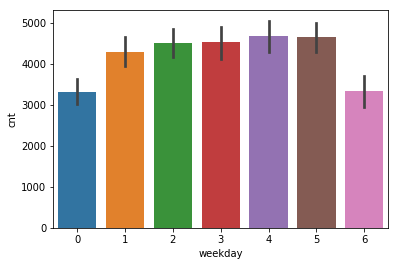

In [10]:
sns.barplot(x='weekday',y='cnt',data=data)
plt.show()

In [11]:
data_s1=data[data['season']==1].groupby(['weekday'])
data_s2=data[data['season']==2].groupby(['weekday'])
data_s3=data[data['season']==3].groupby(['weekday'])
data_s4=data[data['season']==4].groupby(['weekday'])

In [12]:
plt.figure(figsize=(14,5))
plt.plot(data_s1.index,data_s1.values,color='green')
plt.plot(data_s2.index,data_s2.values,color='blue')
plt.plot(data_s3.index,data_s3.values,color='red')
plt.plot(data_s4.index,data_s4.values,color='yellow')
plt.show()

AttributeError: Cannot access attribute 'index' of 'DataFrameGroupBy' objects, try using the 'apply' method

<Figure size 1008x360 with 0 Axes>

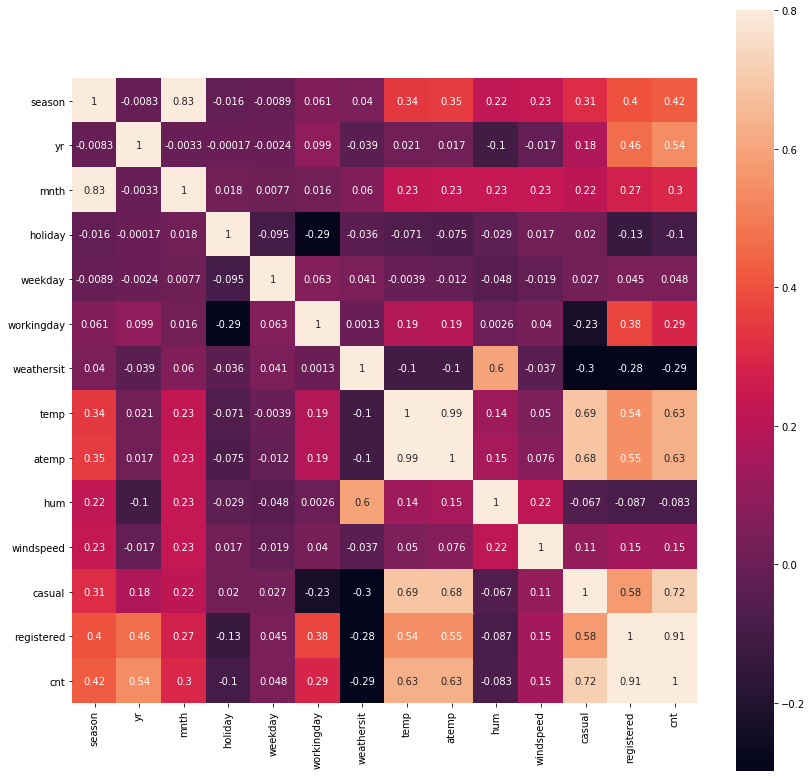

In [13]:
cor=data.corr()
plt.figure(figsize=(14,14))
sns.heatmap(cor,square=True,vmax=0.8,annot=True)
plt.show()

In [14]:
column=[c for c in data.columns if c not in ['atemp','registered','season']]
data1=data[column]

In [15]:
data1.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'hum', 'windspeed', 'casual', 'cnt'],
      dtype='object')

In [16]:
data1.head(5)

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,cnt
0,0,1,0,6,0,2,0.344167,0.805833,6.232627,18.193405,985
1,0,1,0,0,0,2,0.363478,0.696087,4.023513,11.445523,801
2,0,1,0,1,1,1,0.196364,0.437273,4.027240,10.954451,1349
3,0,1,0,2,1,1,0.200000,0.590435,6.238459,10.392305,1562
4,0,1,0,3,1,1,0.226957,0.436957,5.350455,9.055385,1600


In [17]:
cname=['temp','hum','windspeed','casual']
for i in cname:
    data1[i]=(data1[i]-data1[i].mean())/data1[i].std()

C:\Users\Surya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
import random
k=int(np.ceil(len(data1)/70))
rand_num=random.randrange(0,k)
sys_sample=data1.iloc[rand_num::k,:]

In [19]:
X=np.array(data1.drop(['cnt'],1))
y=data1.cnt

In [20]:
from sklearn.metrics import r2_score
def MAPE(y_true,pred):
    mape=np.mean(np.abs(y_true-pred)/y_true)*100
    return mape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print(MAPE(y_test,pred))
print(r2_score(y_test,pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred_d=dtr.predict(X_test)
print(MAPE(y_test,pred_d))
print(r2_score(y_test,pred_d))

In [ ]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rm=RandomForestRegressor(n_estimators=100)
rm.fit(X_train,y_train)
predict=rm.predict(X_test)
print(MAPE(y_test,predict))
print(r2_score(y_test,predict))

In [ ]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
predict_gbr=gbr.predict(X_test)
print(MAPE(y_test,predict_gbr))
print(r2_score(y_test,predict_gbr))

In [ ]:
lr_data=[]
lr_data=pd.DataFrame(lr_data)
lr_data['Actual'],lr_data['Predicted']=y_test,predict_gbr
sns.lmplot('Actual','Predicted',data=lr_data)
plt.show()